In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Parallel, Pipeline, FeatureUnion


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

#packages/tools to help check correlation
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant


from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [2]:
train = pd.read_csv("Train_maskedv2.csv")


In [3]:
train.shape

(3174, 50)

In [4]:
train.describe()

,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
count,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,...,3174.000000,3174.000000,3174.0,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000
mean,3429.319013,12407.679534,10.258947,0.710593,0.097372,0.031894,0.005820,0.008202,0.006047,0.022225,...,0.050327,0.012342,0.0,0.014335,0.863095,0.041924,0.017665,0.073692,0.003624,0.830599
std,3117.342795,9310.300318,12.847192,0.217458,0.188484,0.078634,0.018592,0.029408,0.023772,0.036762,...,0.153493,0.020594,0.0,0.041155,0.248096,0.146524,0.074607,0.169049,0.010378,0.208129
min,1.000000,402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.011053,0.000000,0.000000,0.000000,0.000000,0.001692
25%,1668.367500,6972.024960,0.429761,0.591480,0.002919,0.002421,0.000000,0.000000,0.000000,0.002676,...,0.000453,0.002477,0.0,0.000000,0.879603,0.000960,0.000848,0.000445,0.000633,0.788085
50%,2263.921720,9217.504670,3.715314,0.766925,0.010649,0.005792,0.000803,0.000603,0.000813,0.008408,...,0.003092,0.006266,0.0,0.000097,0.989811,0.003088,0.001753,0.001206,0.001630,0.909446
75%,3681.155303,13463.543668,17.762604,0.885571,0.074650,0.028085,0.002538,0.002145,0.002921,0.025111,...,0.028330,0.013430,0.0,0.011548,0.995798,0.012419,0.004636,0.039255,0.004025,0.963780
max,39595.195110,91716.746370,100.000000,0.994962,0.931490,0.951806,0.264239,0.392085,0.435912,0.412936,...,0.991674,0.367785,0.0,0.998448,1.000000,0.969519,0.939564,0.940563,0.367842,1.000000


In [5]:
cor = ["target_pct_vunerable","total_households", "total_individuals", "dw_00","dw_01","dw_03","dw_04","dw_06","dw_07","dw_08","lgt_00","lan_00", "lan_01","lan_02","lan_04","lan_06","lan_07","psa_00","psa_01","psa_02","stv_01","car_01","lln_01","pg_00","pg_01","pg_02","pg_03"]

In [6]:
new_train = train[cor]

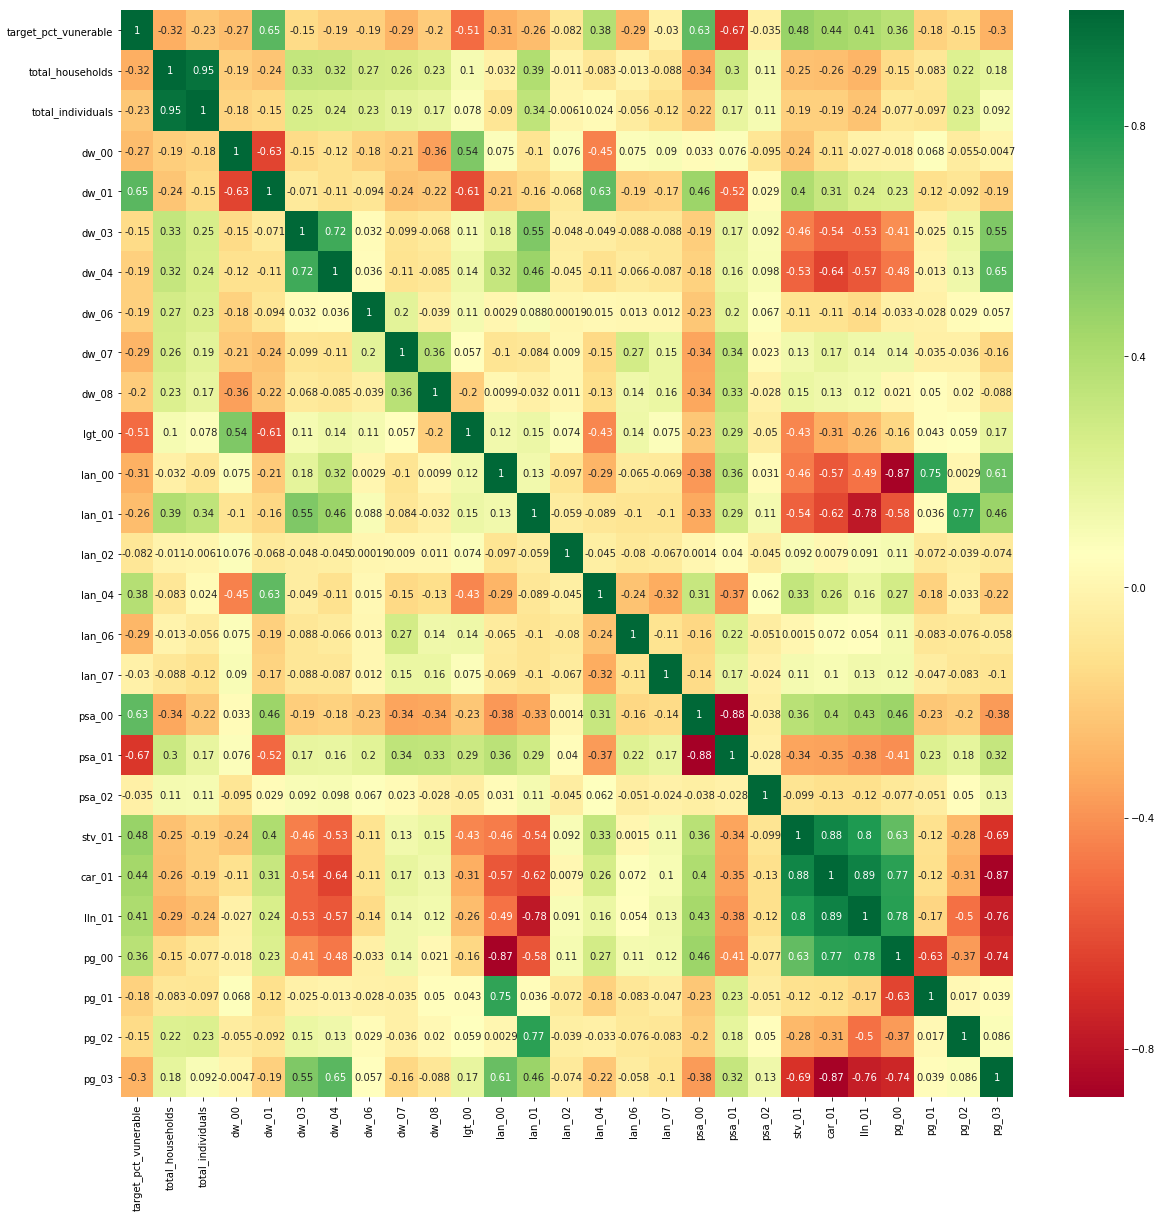

In [7]:
# correlarion
import seaborn as sns
# get the correlation of each data in dataset

plt.figure(figsize=(20,20))
#ploting a heat map to see how they relate
sns.heatmap(new_train.corr(), annot=True , cmap='RdYlGn')

#sns.heatmap(new_train.corr())

In [8]:
from sklearn.model_selection import train_test_split as tts

Xtrain, Xtest, ytrain, ytest = tts(new_train.drop(["target_pct_vunerable"], axis=1),
                                   new_train.target_pct_vunerable, test_size=.18, shuffle=True)

In [11]:
# Import sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score

# Import the Naive Bayes, logistic regression, Bagging, RandomForest, AdaBoost, GradientBoost, Decision Trees and SVM Classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
#from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib import style
#plt.style.use('bmh')
#plt.style.use('ggplot')
plt.style.use('seaborn-notebook')

from matplotlib.ticker import StrMethodFormatter

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

In [12]:
from sklearn import preprocessing  

ss= preprocessing.MinMaxScaler()


In [13]:
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.transform(Xtest)

In [14]:
ytrain, ytest = np.log1p(ytrain), np.log1p(ytest)

In [1]:
from xgboost import XGBRegressor

OSError: [WinError 126] The specified module could not be found

In [2]:
#from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor

#rfr = RandomForestRegressor(n_estimators=100)

#xg = XGBRegressor(max_depth=9, n_estimators=500)
#cat = CatBoostRegressor(silent=True, n_estimators=300)

ImportError: No module named 'catboost'

In [29]:
clfs = [
    
    rfr,
    adaboost,
    gb
    
]

In [16]:
#logreg = LogisticRegression()

#logreg.fit(Xtrain, ytrain.ravel())

In [17]:
rfr.fit(Xtrain, ytrain.ravel())


#adaboost.fit(Xtrain, ytrain.ravel())
#gb.fit(Xtrain, ytrain.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
#logreg.fit(Xtrain, ytrain.ravel())
#dt.fit(Xtrain, ytrain.ravel())

In [19]:
train_pred_rf = rfr.predict(Xtrain)
#train_pred_xg = xg.predict(Xtrain)
#train_pred_cat = cat.predict(Xtrain)

In [20]:
test_pred_rf = rfr.predict(Xtest)
#test_pred_xg = xg.predict(Xtest)
#test_pred_cat = cat.predict(Xtest)

In [21]:
test = pd.read_csv("Test_maskedv2.csv")
new_test = test[cor[1:]] #to exclude the target variable
new_test_sd = ss.transform(new_test)
testt = rfr.predict(new_test_sd) #using the cat model to make predictions only

In [24]:
ex = np.expm1(testt)

In [25]:
rf_ex = np.array(ex) #turn to an array from list

In [26]:
sub = pd.read_csv("samplesubmissionv2.csv")
sub.target_pct_vunerable = rf_ex

sub.to_csv("RF.csv", index=False)
sub

,ward,target_pct_vunerable
0,00A93O0,14.083973
1,01V40KO,30.624461
2,01ZHVW0,2.408739
3,028YQJX,2.795436
4,02G8W11,0.475627
5,03RU77Q,9.424032
6,0935C30,15.573997
7,0DCE4FB,18.938172
8,0DUEHMX,2.397067
9,0FTXTHP,4.562134
